In [432]:
from dotenv import load_dotenv
import os
import base64
import urllib
import requests as req
from bs4 import BeautifulSoup as bs
import json
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import re
import pandas as pd
import numpy as np

# priming the spotify API   

checking for client_id and client_secret

In [433]:
load_dotenv()	# draws from our .env file

client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')



print(client_id, client_secret) # checking!


482ffdd79ccc4595ae74ef0b9aa138ac 416fefa3cb614e22938fac1a37455ac6


functions for getting token and authorized header as documented by spotify

In [434]:
def get_token():
	auth_string = client_id + ':' + client_secret
	auth_bytes = auth_string.encode('utf-8')
	auth_base64 = str(base64.b64encode(auth_bytes), 'utf-8')
	url = 'https://accounts.spotify.com/api/token'
	headers = {
		'Authorization' : 'Basic ' + auth_base64,
		'Content-Type' : 'application/x-www-form-urlencoded'
	}
	data = {
		'grant_type' : 'client_credentials'
	}
	result = req.post(url, headers = headers, data = data)
	json_result = json.loads(result.content)
	token = json_result['access_token']
	return token


def get_auth_header(token):
	return {'Authorization' : 'Bearer ' + token}

token = get_token()
print(token)

BQDYLusrmusnxNKolTwGOvZ2gLF33qkPB5-ByBoVgzVpe7dg55Da8lxPrQ4h-BwXXIG40-l204KJQi9bOfA4hp-Bq62FeGoG5SpCpo0ljDOdl6a9bi0


we will attempt to use the given tokens and implement some simple functions to confirm that it works

In [435]:
def search_for_artist(token : str, artist_name : str) -> dict:
	url = 'https://api.spotify.com/v1/search'
	headers = get_auth_header(token)
	#limit=1 limits to one artist in search
	query = f'?q={artist_name}&type=artist&limit=1'

	query_url = url + query
	result = req.get(query_url, headers = headers)
	json_result = json.loads(result.content)['artists']['items']
	if len(json_result) == 0:
		print('no artist')
		return None
	
	return json_result[0]

In [436]:
def get_songs_by_artist(token : str, artist_id : str, country : str = 'US') -> dict:
	url = f'https://api.spotify.com/v1/artists/{artist_id}/top-tracks?country={country}'

	headers = get_auth_header(token)
	result = req.get(url, headers = headers)
	json_result = json.loads(result.content)['tracks']

	# display artist image
	artist_url = f'https://api.spotify.com/v1/artists/{artist_id}'
	imgresult = req.get(artist_url, headers = get_auth_header(token))
	img_url = json.loads(imgresult.content)['images'][2]['url']
	urllib.request.urlretrieve(img_url, 'artist_img')

	Image.open('artist_img')

	# print artist top 10 tracks (is included in the return val)
	for no, song in enumerate(json_result, 1):
		print(f"{no}. {song['name']}")
	
	return json_result

In [437]:
changmo = search_for_artist(token, 'changmo')
changmo
iu = search_for_artist(token, 'IU')
iu

{'external_urls': {'spotify': 'https://open.spotify.com/artist/3HqSLMAZ3g3d5poNaI7GOU'},
 'followers': {'href': None, 'total': 8284475},
 'genres': ['k-pop', 'pop'],
 'href': 'https://api.spotify.com/v1/artists/3HqSLMAZ3g3d5poNaI7GOU',
 'id': '3HqSLMAZ3g3d5poNaI7GOU',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb006ff3c0136a71bfb9928d34',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174006ff3c0136a71bfb9928d34',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178006ff3c0136a71bfb9928d34',
   'width': 160}],
 'name': 'IU',
 'popularity': 69,
 'type': 'artist',
 'uri': 'spotify:artist:3HqSLMAZ3g3d5poNaI7GOU'}

In [438]:
songschangmo = get_songs_by_artist(token, changmo['id'])
print('\n')
songsiu = get_songs_by_artist(token, iu['id'])

1. Smoke (Prod. Dynamicduo, Padi) - Remix
2. METEOR
3. BAND
4. BLUE MOON (Prod. GroovyRoom)
5. SMF (Prod. Czaer)
6. 아름다워
7. 119 REMIX
8. Maestro
9. Selfmade Orange
10. wish


1. People Pt.2 (feat. IU)
2. eight(Prod.&Feat. SUGA of BTS)
3. LILAC
4. Celebrity
5. BBIBBI
6. Blueming
7. Can't Love You Anymore (With OHHYUK)
8. Palette (feat. G-DRAGON)
9. Through the Night
10. Good day


now that we confirmed the token is working, we will attempt to extract necessary datas from the Spotify-created playlists:

Spotify Top Hits of 2008: https://open.spotify.com/playlist/37i9dQZF1DWYuGZUE4XQXm       

Spotify Top Hits of 2009: https://open.spotify.com/playlist/37i9dQZF1DX4UkKv8ED8jp   
      
Spotify Top Hits of 2010: https://open.spotify.com/playlist/37i9dQZF1DXc6IFF23C9jj

Spotify Top Hits of 2011: https://open.spotify.com/playlist/37i9dQZF1DXcagnSNtrGuJ

Spotify Top Hits of 2012: https://open.spotify.com/playlist/37i9dQZF1DX0yEZaMOXna3

Spotify Top Hits of 2013: https://open.spotify.com/playlist/37i9dQZF1DX3Sp0P28SIer

Spotify Top Hits of 2014: https://open.spotify.com/playlist/37i9dQZF1DX0h0QnLkMBl4

Spotify Top Hits of 2015: https://open.spotify.com/playlist/37i9dQZF1DX9ukdrXQLJGZ

Spotify Top Hits of 2016: https://open.spotify.com/playlist/37i9dQZF1DX8XZ6AUo9R4R

Spotify Top Hits of 2017: https://open.spotify.com/playlist/37i9dQZF1DWTE7dVUebpUW

Spotify Top Hits of 2018: https://open.spotify.com/playlist/37i9dQZF1DXe2bobNYDtW8

Spotify Top Hits of 2019: https://open.spotify.com/playlist/37i9dQZF1DWVRSukIED0e9

Spotify Top Tracks of 2020: https://open.spotify.com/playlist/37i9dQZF1DX7Jl5KP2eZaS

Spotify Wrapped 2021: 


note) Spotify published playlists under the name 'Top Hits' until 2019, 'Top Tracks' on 2020, and since named their popular playlist 'Spotify Wrapped' as of 2021. 


# analysis

we will read from an outer csv file that contains the most streamed tracks in YouTube Music from 2010. 

> I attempted to draw from an outer website that had organized most streamed videos by years. However, the parsing of the artist and track name was difficult as the html table drew from youtube video titles, which did not have a fixed format. Also, I realized that the user base of Youtube Music was not what I expected to be. Therefore, I will attempt to utilized the Spotify API and their 'Spotify Wrapped' as a marker to popular music.

In [439]:
#youtube_music = {}

#for top_mv_by_yr in range(2010, 2024):
    #year = top_mv_by_yr
    #url = f'https://kworb.net/youtube/topvideos{year}.html'
    #youtube_music[top_mv_by_yr] = req.get(url)

In [440]:
##soup = bs(youtube_music[2023].text)
# extract views in str(\d\d\d,\d\d\d,\d\d\d) format and converted to int
##views = list(map(lambda x : x.text.replace(',', ''), soup.find_all('td')[ 1 : : 2 ]))

# extract titles and artist
##title_artist = list(map(lambda x : x.find('a').text, soup.find_all('td')[0 : : 2]))

# obtained url for another page in the website with an embedded link for the youtube file
##url = []
#for raw_url in soup.find_all('td')[0 : : 2]:
#    inhouse = raw_url.find('a')['href']
#    #print(f'worked for {listed}')
#    inhouse_url = bs(req.get(f'https://kworb.net/youtube/{inhouse}').text).find_all('iframe')[0]['src']
#    youtube_id = re.search(r'[^/]\w+[?$]', inhouse_url)[0][0 : -1]
#    youtube_url = f'https://www.youtube.com/watch?v={youtube_id}'
#    url.append(youtube_url)
#
#print(title_artist[0], views[0])
#
#df = pd.DataFrame([title_artist, views, url]).T
#df.columns = ['title_artist', 'views', 'url']
#df.index.name = '2023'
#df

# I attempted to draw from an outer website that had organized most streamed videos by years.
# However, the parsing of the artist and track name was difficult 
# as the html table drew from youtube video titles, which did not have a fixed format. 
# Also, I realized that the user base of Youtube Music was not what I expected to be. 
# Therefore, I will attempt to utilized the Spotify API 
# and their 'Spotify Wrapped' as a marker to popular music.

we will now get a function to search the song on spotify, and forward them to a pandas dataframe. 

In [441]:
spotifyplaylists = {
'hits2008' : 'https://open.spotify.com/playlist/37i9dQZF1DWYuGZUE4XQXm',
'hits2009' : 'https://open.spotify.com/playlist/37i9dQZF1DX4UkKv8ED8jp',
'hits2010' : 'https://open.spotify.com/playlist/37i9dQZF1DXc6IFF23C9jj',
'hits2011' : 'https://open.spotify.com/playlist/37i9dQZF1DXcagnSNtrGuJ',
'hits2012' : 'https://open.spotify.com/playlist/37i9dQZF1DX0yEZaMOXna3',
'hits2013' : 'https://open.spotify.com/playlist/37i9dQZF1DX3Sp0P28SIer',
'hits2014' : 'https://open.spotify.com/playlist/37i9dQZF1DX0h0QnLkMBl4',
'hits2015' : 'https://open.spotify.com/playlist/37i9dQZF1DX9ukdrXQLJGZ',
'hits2016' : 'https://open.spotify.com/playlist/37i9dQZF1DX8XZ6AUo9R4R',
'hits2017' : 'https://open.spotify.com/playlist/37i9dQZF1DWTE7dVUebpUW',
'hits2018' : 'https://open.spotify.com/playlist/37i9dQZF1DXe2bobNYDtW8',
'hits2019' : 'https://open.spotify.com/playlist/37i9dQZF1DWVRSukIED0e9',
'hits2020' : 'https://open.spotify.com/playlist/37i9dQZF1DX7Jl5KP2eZaS',
'hits2022' : 'https://open.spotify.com/playlist/37i9dQZF1DX18jTM2l2fJY'
}

In [442]:
get_playlist_id = lambda x : re.search(r'[^/]\d\w+[\w$]', x).group(0)

for key, val in spotifyplaylists.items():
    print(get_playlist_id(val))


37i9dQZF1DWYuGZUE4XQXm
37i9dQZF1DX4UkKv8ED8jp
37i9dQZF1DXc6IFF23C9jj
37i9dQZF1DXcagnSNtrGuJ
37i9dQZF1DX0yEZaMOXna3
37i9dQZF1DX3Sp0P28SIer
37i9dQZF1DX0h0QnLkMBl4
37i9dQZF1DX9ukdrXQLJGZ
37i9dQZF1DX8XZ6AUo9R4R
37i9dQZF1DWTE7dVUebpUW
37i9dQZF1DXe2bobNYDtW8
37i9dQZF1DWVRSukIED0e9
37i9dQZF1DX7Jl5KP2eZaS
37i9dQZF1DX18jTM2l2fJY


In [443]:
def get_playlist_info(token : str, playlist_id : str) -> dict:
	'''
	This function takes the ID of a Spotify playlist and returns attributes associated with it

	@param token : The Spotify API Token provided by function get_token()
	@param playlist_id : The playlist ID associated with the playlist to analyze

	@return : returns the attributes of the Spotify playlist

	'''
	url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'

	headers = get_auth_header(token)
	result = req.get(url, headers = headers)
	json_result = json.loads(result.content)
	return json_result

def get_playlist_tracks(playlist_json : dict) -> dict:
	'''
	This function takes the return value of function 'get_playlist_info' and returns track ids of the tracks in the playlist

	@param playlist_json : attributes of a Spotify playlist

	@return : returns a dict of keys= name of track, and vals= IDs of the tracks in the playlist

	'''
	playlist_tracks = {}
	for tracks in playlist_json['items']:
		playlist_tracks[tracks['track']['name']] = tracks['track']['id']
	return playlist_tracks

def get_track_info(token : str, track_id : str) -> pd.Series:
	'''
	This function takes the the ID of a Spotify track and returns attributes associated with it

	@param token : The Spotify API Token provided by function get_token()
	@param track_id : The track ID associated with the track to analyze

	@return : returns a pandas Series with variables: artists, duration, name, popularity.

	'''
	url = f'https://api.spotify.com/v1/tracks/{track_id}'
    
	headers = get_auth_header(token)
	result = req.get(url, headers = headers)
	json_result = json.loads(result.content)
    
	artists = json_result['artists'][0]['name']
	duration_ms = json_result['duration_ms'] 

	min = int(duration_ms / 60000)
	sec = str(((duration_ms / 60000) - min) * 0.6)[2:4]
	duration = str(min) + ':' + sec
	track_name = json_result['name']
	release_year = int(re.search(r'\d\d\d\d', json_result['album']['release_date']).group(0))
	popularity = json_result['popularity']
	

	return pd.Series([track_name, artists, duration, duration_ms, release_year, popularity])


In [444]:
def streamline(token : str, playlist_id : str) -> pd.DataFrame:
    '''
    This function streamlines the process of creating a dataframe from the playlist ID, combining 3 functions: get_playlist_info, 
    get_playlist_tracks, get_track_info.
    It also breaks when n exceeds 50 for consistency on playlists
    '''
    playlist_json = get_playlist_info(token, playlist_id)
    playlist_tracks = get_playlist_tracks(playlist_json)

    df = pd.DataFrame()
    for track_id in playlist_tracks.values():
        new_row = pd.DataFrame(get_track_info(token, track_id)).T
        df = pd.concat([df, new_row])
        if (df.shape[0] >= 50):
            break;

    df.columns = ['track_name', 'artist', 'duration', 'duration_ms', 'release_year', 'popularity']
    df.index.name = df.release_year.mode()[0]
    df.index = range(df.shape[0])
    return df

In [445]:
hits2020df = streamline(token,'37i9dQZF1DX7Jl5KP2eZaS')

In [446]:
hits2020df[['release_year', 'popularity']].groupby('release_year').agg('count')

,popularity
release_year,
2016,1
2018,3
2019,20
2020,23
2021,3


In [447]:
get_track_info(token, '7x9aauaA9cu6tyfpHnqDLo')

0    Seven (feat. Latto) (Explicit Ver.)
1                              Jung Kook
2                                   3:04
3                                 184400
4                                   2023
5                                     93
dtype: object

In [448]:
hitsdf = {}

for key, val in spotifyplaylists.items():
    dfname = str(key) + 'df'
    playlist_id = get_playlist_id(val)
    hitsdf[dfname] = streamline(token, playlist_id)

In [449]:
# I have the data for 2021 in a .csv format, from a Kaggle dataset (https://www.kaggle.com/datasets/equinxx/spotify-top-50-songs-in-2021),
# so I will extract the track IDs from the .csv file and forward it to the get_track_info() function, and then add it to the hitsdf dictionary.

hits2021 = pd.read_csv('./hits2021.csv')


df21 = pd.DataFrame()
for track_id in hits2021.id:
    new_row = pd.DataFrame(get_track_info(token, track_id)).T
    df21 = pd.concat([df21, new_row])
    if (df21.shape[0] >= 50):
        break

df21.columns = ['track_name', 'artist', 'duration', 'duration_ms', 'release_year', 'popularity']
df21.index.name = 2021
df21.index = range(df21.shape[0])

hitsdf['hits2021df'] = df21

# I have the data for 2023 in a .csv format as well, 
# unfortunately, the 2023 dataset from kaggle (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)
# does not include track IDs, so I will search them using the search_for_track() function.
# to be sure I will compare the danceability score (provided by Spotify API and the 18th column in hits2023.csv) and add only if they match


def search_for_track(token : str, track_name : str, danceability_score : int) -> str:
	'''
	function takes track_name and returns the Spotify track ID. 
	built specifically for the hits2023.csv file

	@ param track_name : name of the track
	@ param danceability_score : extracted from column 18 of hits2023.csv

	@ return : Spotify track ID
	'''
	
	url = 'https://api.spotify.com/v1/search'
	headers = get_auth_header(token)

	#limit=1 limits to one track in search
	query = f'?q={track_name}&type=track&limit=1'
	
	query_url = url + query
	result = req.get(query_url, headers=headers)
	json_result = json.loads(result.content)['tracks']['items']
	if len(json_result) == 0:
		return None

	track_id = json_result[0]['id']
	audio_features = req.get(f'https://api.spotify.com/v1/audio-features/{track_id}', headers=headers)
	danceability = int(json.loads(audio_features.content)['danceability'] * 100)
	if danceability != danceability_score:
		return None
	
	return track_id

hits2023 = pd.read_csv('./hits2023.csv')
hits2023
trackname = hits2023['track_name']
danceability = hits2023['danceability_%']

zipped = list(zip(trackname, danceability))


track_ids_2023 = []
for trackname, danceability in zipped:
    track_id = search_for_track(token, trackname, danceability)
    if (track_id == None):
        continue
    else:
        track_ids_2023.append(track_id)
    
    if (len(track_ids_2023) >= 50):
        break


df23 = pd.DataFrame()
for track_id in track_ids_2023:
    new_row = pd.DataFrame(get_track_info(token, track_id)).T
    df23 = pd.concat([df23, new_row])
df23.columns = ['track_name', 'artist', 'duration', 'duration_ms', 'release_year', 'popularity']
df23.index.name = 2023
df23.index = range(df23.shape[0])

hitsdf['hits2023df'] = df23



In [450]:
# scaffoldings

#get_track_info(token, '7x9aauaA9cu6tyfpHnqDLo')
track_ids_2023
hitsdf.keys()

dict_keys(['hits2008df', 'hits2009df', 'hits2010df', 'hits2011df', 'hits2012df', 'hits2013df', 'hits2014df', 'hits2015df', 'hits2016df', 'hits2017df', 'hits2018df', 'hits2019df', 'hits2020df', 'hits2022df', 'hits2021df', 'hits2023df'])

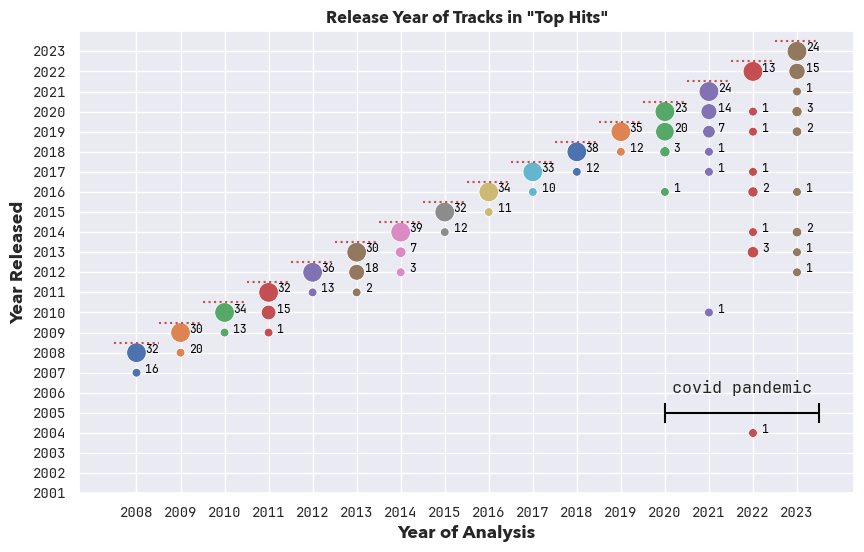

In [451]:
plt.figure(figsize=(10, 6))
sns.set_theme()
jbmono = {'fontname' : 'Jetbrains Mono NL'}
avenir = {'fontname' : 'Avenir Next'}



#fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)  # draws 2 figures in one plot
#ax_bottom.set_position([0, 0, 10, 2])  # [left, bottom, width, height]
#fig.subplots_adjust(hspace = 0.05) # vertical distance between 2 figures


sized_scatterplot = {}
for key, val in hitsdf.items():
    temp = val[['release_year', 'popularity']].groupby('release_year').agg('count')

    # gets year of analysis from the key
    year_of_analysis = re.search(r'\d\d\d\d', key).group(0)
    yoa_int = int(year_of_analysis) # saves year_of_analysis in int form, to ignore tracks added to Spotify after year of analysis 
                                    # this could be due to multiple reasons, but I chose to simply drop these values

    # redefine temp to drop tracks which were added after the year of analysis
    temp = temp.loc[temp.index <= yoa_int]

    # gets the counts of tracks released in a certain year
    counts = list(temp.values.T[0])
    # gets the years tracks were released in
    year_released = list(temp.index)


    # priming a dictionary to use for the scatterplot (x-axis: year of analysis, y-axis: tracks' year of release)
    sized_scatterplot[year_of_analysis] = pd.DataFrame({'counts' : counts, 'year_released' : year_released})

    sns.scatterplot(data=sized_scatterplot[year_of_analysis], x=int(year_of_analysis), y='year_released', size='counts', sizes=(40, 200), legend=False)
    #sns.scatterplot(data=sized_scatterplot[year_of_analysis], x=int(year_of_analysis), y='year_released', size='counts', sizes=(40, 200), legend=False, ax=ax_bottom)
   
    # text) the count of songs released in the given year
    for line in range(0, sized_scatterplot[year_of_analysis].shape[0]):
        plt.text(int(year_of_analysis) + 0.2, 
                 sized_scatterplot[year_of_analysis]['year_released'][line], 
                 sized_scatterplot[year_of_analysis]['counts'][line], 
                 horizontalalignment='left', size='x-small', color='black', weight='normal', **jbmono)
    plt.hlines(int(year_of_analysis) + 0.5, int(year_of_analysis) - 0.5, int(year_of_analysis) + 0.5, color='r', linestyles='dotted')


# because we have an outlier (1975), we will divide the plots into subplots as a broken y-axis 
# note) the outlier is 'Bohemian Rapsody' by Queen, appearing on 2019's statistics, which is the year movie 'Bohemian Rapsody' was released





#ax_top.set_ylim(2000, 2025) # 윗 부분 y축 범위 설정
#ax_bottom.set_ylim(1973, 1980) # 아랫 부분 y축 범위 설정



plt.title('Release Year of Tracks in "Top Hits"', **avenir)
plt.xlabel('Year of Analysis', fontsize=13, **avenir)
plt.ylabel('Year Released', fontsize=13, **avenir)
plt.xticks(range(2008, 2024, 1), fontsize=10, **jbmono)

plt.yticks(range(2000, 2024, 1), fontsize=10, **jbmono)
#ax_bottom.yticks(range(1960, 1980, 1), fontsize=10, **jbmono)
plt.ylim(2001, 2024)


# visual
plt.hlines(2005, 2023.5, 2020, color='black')
plt.vlines(2020, 2004.5, 2005.5, color='black')
plt.vlines(2023.5, 2004.5, 2005.5, color='black')
plt.text(2020.15, 2006, 'covid pandemic', **jbmono)


plt.show()

In [452]:
hitsdf['hits2022df'][['popularity', 'release_year']].groupby('release_year').agg('count')
hitsdf['hits2022df'].loc[hitsdf['hits2022df']['release_year'] == 2013]

,track_name,artist,duration,duration_ms,release_year,popularity
10,I Wanna Be Yours,Arctic Monkeys,3:03,183956,2013,95
20,Another Love,Tom Odell,4:04,244360,2013,92
35,Sweater Weather,The Neighbourhood,4:00,240400,2013,92


### note on outliers

year of analysis:
    2019: Bohemian Rapsody (Queen) -> release of movie 'Bohemian Rapsody'
    2022: Running Up That Hill (Kate Bush) -> OST for stranger things

# Analysis on Lyrics

because the vanilla attributes offered by Spotify API rather lacks detailed information I would like for my analysis such as genre and country of release, I will get help from an outer database, Genius.com. 

I will authenticate with the Genius API to get 2 new columns: 'lyrics' and 'language'

Unfortunately, Genius Music API requires actual browser interaction to get access to the token, and therefore it is impossible to implement a code to automate the process.

In [453]:
# update manually
token_Genius = 'Yxa-e7shKcb5ilSoSgKPSh9TuxkqBV9STR3hKyvuWtil3UaN56qEfZ2myslMKIqk'

In [454]:
def Genius_lyrics_search(token_Genius : str, track_title : str, artist_name : str) -> str:

    # for some reason, Genius API does not return a valid search result if there is a colon behind the track title 
            # pattern = r'[a-zA-Z\d\s]+[$\W]'
            # if (len(re.findall(pattern, track_title)) > 0):
            #     track_title = re.search(pattern, track_title)[0][:-1]
            # else:
            #     pass
        
    # rather than using the re package, this keeps it simpler and works better
    if '(' in track_title:
        track_title = track_title.split('(')[0]
    if '-' in track_title:
        track_title = track_title.split('-')[0]


    url = f'https://api.genius.com/search?q={track_title}%2C%20{artist_name}'
    headers = {
        'Authorization' : 'Bearer ' + token_Genius
    }
    api_link = req.get(url, headers = headers)
    json_result = json.loads(api_link.content)
    try:
        song_api_path = json_result['response']['hits'][0]['result']['api_path']
    except:
        return 'not found'

    return song_api_path


def get_Genius_lyrics(api_path : str) -> str:
    '''
    passes on api_path from Genius_lyrics_search() and returns string value of lyrics
    '''
    if (api_path == 'not found'):
        return 'not found'
    
    soup = bs(req.get(f'https://genius.com{api_path}').text)
    lyrics = ''
    for parts in soup.find_all('div', {'class' : 'Lyrics__Container-sc-1ynbvzw-1 kUgSbL'}):
        lyrics += parts.get_text(separator=' ')

    lyrics = re.sub(r'\[.*?\]', '\n', lyrics)

    return lyrics

def Streamline_Genius(token_Genius : str, song_title : str, artist_name : str) -> str:
    api_path = Genius_lyrics_search(token_Genius, song_title, artist_name)
    #print(api_path)
    return get_Genius_lyrics(api_path)



In [455]:
# for track, artist in hitsdf['hits2022df'][['track_name', 'artist']].values:
#     f = open(f'./testing/{track}.txt', 'w')
#     f.write(Streamline_Genius(token_Genius, track, artist))
#     f.close()

In [456]:
error_list = []

for years in hitsdf.keys():
    dir_name = re.search('\d\d\d\d', years)[0] + '_lyrics'
    os.mkdir(f'./{dir_name}')
    for track, artist in hitsdf[f'{years}'][['track_name', 'artist']].values:
        # 파일경로에 쓰는 특수기호들 정리해서 리플레이스
        try:
            f = open(f'./{dir_name}/{track}_{artist}.txt', 'w')
            f.write(Streamline_Genius(token_Genius, track, artist))
            f.close()
        except:
            print('error in ' + track + ' ' + artist + ' ' + years)
            error_list.append((years, track, artist))

IndentationError: unexpected indent (3262968580.py, line 4)

In [ ]:
error_list

[('hits2008df', 'I Kissed A Girl', 'Katy Perry'),
 ('hits2014df',
  'Let It Go - From "Frozen"/Soundtrack Version',
  'Idina Menzel'),
 ('hits2017df', 'More Than You Know', 'Axwell /\\ Ingrosso'),
 ('hits2022df', 'Lo Siento BB:/ (with Bad Bunny & Julieta Venegas)', 'Tainy')]

In [457]:
track = 'I Kissed A Girl'
artist = 'Katy Perry'

f = open(f'./2008_lyrics/{track}_{artist}.txt', 'w')
f.write(get_Genius_lyrics('/songs/130024'))
f.close()

Now we will attempt to analyze the frequency and such of the given lyrics.

Before we do so, there are some preliminary steps of stemming and lemmatization. For this, we will simply draw from the textblob package. 

Also, we will put to use the Bag of Word assumption, in that we need not know the sequence of words in order to understand the underlying trend of the corpus. 

After forming a Document-Term Matrix (DTM), We will conduct the following:
    (a) Cosine Similarity Between the corpora (in this case, the lyrics folders for each year)
    (b) Frequency Analysis
    

note)
    Cold Heart - Elton John - edit
    I Can See You - 2023 - taylor swift - edit
    Seven - 2023 - edit
    What was i made for - 2023 - edit


In [ ]:
!python -m textblob.download_corpora

In [459]:
from textblob import TextBlob

def pos_tagger(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'}
    words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags]
    return lemma_list

import nltk
from nltk.corpus import stopwords
 
# because the normal stopwords database contains words (such as, but not limited to: she, him, i, you) 
# that are crucial in song lyrics,
# I took the time to remove some pronouns from the stop words database 
# database from: https://github.com/igorbrigadir/stopwords/blob/master/en/terrier.txt

stopwords_en = open('./stopwords_en.txt').read()
stopwords_en = stopwords_en.split('\n')

nltk.download('stopwords')
stopwords_esp = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samuellee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [460]:
def lyrics_to_df(filepath : str) -> pd.DataFrame:
    f = open(filepath, 'r')

    # cleaning lyrics
    clean_lyrics = f.read().strip().replace('\n', ' ').lower()
    clean_lyrics = re.sub("[(]|[)]|[']|[\"]", ' ', clean_lyrics)

    # lemmatization
    lyrics_lemmatized_raw = pos_tagger(clean_lyrics)

    # removing stop words
    lyrics_lemmatized = []
    for w in lyrics_lemmatized_raw:
        if w in stopwords_en:
            w = ''
        if w in stopwords_esp:
            w = ''
        if len(w) < 3 and w!='i':
            w = ''
        lyrics_lemmatized.append(w)

    words_counts = np.unique(lyrics_lemmatized, return_counts=True)
    df = pd.DataFrame({'words' : words_counts[0], 'counts' : words_counts[1]})
    df = df.drop(index=df.loc[df.words == ''].index)

    return df


df_base = pd.DataFrame({'words' : [], 'counts' : []})

def count_occurances(df : pd.DataFrame, df_base : pd.DataFrame = df_base) -> pd.DataFrame:
    ''' 
    @param df : a dataframe created by lyrics_to_df()
    @pram df_base : df to be merged with existing dataframe. used for initialization
    '''
    df_merged = pd.merge(df, df_base, on='words', how='outer').replace(np.NaN, 0)
    df_merged['counts_x'] += df_merged.counts_y
    df_merged = df_merged.drop(columns = 'counts_y')
    df_merged.columns=['words', 'counts']
    df_merged = df_merged.sort_values(by = 'counts', ascending=False)
    df_merged.index = range(df_merged.shape[0])

    return df_merged

let us use some lyrics data from the year 2023 as a statistic

In [461]:
os.chdir('/Users/samuellee/_codes/dspj_musicsoci/spotify/')

In [462]:
sample_lyrics = os.listdir('./2023_lyrics/')[ : 10]

dji_df = pd.DataFrame()
for i in sample_lyrics:
    filepath = f'./2023_lyrics/{i}'
    # print(i)
    df1 = lyrics_to_df(filepath)
    if (dji_df.shape[1] != 2):
        dji_df = count_occurances(df1)
    dji_df = count_occurances(dji_df, df1)

dji_df

,words,counts
0,i,190.0
1,you,127.0
2,she,88.0
3,popular,72.0
4,yeah,63.0
...,...,...
798,mission,1.0
799,necktie,1.0
800,happen,1.0
801,note,1.0


In [463]:
lyrics_dir = os.listdir('./')
lyrics_dir = list(filter(lambda x : os.path.isdir(x), lyrics_dir))


df_lyrics_occ = {}
## loops through all lyrics files 
for playlists in lyrics_dir:
    god_dir = '/Users/samuellee/_codes/dspj_musicsoci/spotify'
    dir = f'{god_dir}/{playlists}'
    plst = os.listdir(dir)
    dji_df = pd.DataFrame()
    for lyrics in plst:
        try:
            filepath = f'{dir}/{lyrics}'
            df1 = lyrics_to_df(filepath)
            if (dji_df.shape[1] != 2):
                dji_df = count_occurances(df1)
            dji_df = count_occurances(dji_df, df1)
        except:
            print('error at ' + lyrics + ' in ' + playlists)
    
    df_lyrics_occ[playlists] = dji_df

In [464]:
# scaffolding

a = lyrics_to_df('./2008_lyrics/4 Minutes (feat. Justin Timberlake & Timbaland)_Madonna.txt')
b = lyrics_to_df('./2008_lyrics/Apologize_Timbaland.txt')

count_occurances(a, b)

,words,counts
0,i,42.0
1,ayy,39.0
2,you,38.0
3,fikki,24.0
4,minute,24.0
...,...,...
98,tonight,1.0
99,wan,1.0
100,waste,1.0
101,way,1.0


# Proving that there is a trend within Popular Music

the underlying assumption we had when conducting this research was that popular music follows a certain trend that encompasses the trend of society in general. Hence, it would be safe to assume that each playlist contains a trend in its own - leading to the similarity of given lyrics.

To prove this assumption and conduct further research based on it, we will run a cosine similarity test on the given corpora. 

In [465]:
def cosine_sim(list1 : list, list2 : list) -> float:
    return np.dot(list1, list2) / (np.linalg.norm(list1) * np.linalg.norm(list2))


def dtm_to_cosine_sim(df1 : pd.DataFrame, df2 : pd.DataFrame) -> float:
    combined = pd.merge(df1, df2, on='words', how='outer').replace(np.NaN, 0)
    list1_raw = combined.counts_x
    list2_raw = combined.counts_y
    return cosine_sim(list1_raw, list2_raw)


In [665]:
def cos_sim_corpus(year : int):
    plst = os.listdir(f'./{str(year)}_lyrics/')

    lyrics_list = []

    for lyrics in plst:
        try:
            filepath = f'./{str(year)}_lyrics/{lyrics}'
            dji_df = lyrics_to_df(filepath)
            lyrics_list.append(dji_df)
        except:
            print('error at ' + lyrics + ' in ' + playlists)

    # code for average cosine
    cos = 0

    for i in range(len(lyrics_list) - 1):
        j = i + 1
        while len(lyrics_list) - j - 1 != 0:
            a = dtm_to_cosine_sim(lyrics_list[i], lyrics_list[j])
            cos += a
        #print(i)
        #print(j)
            j += 1

    sigma_sum = lambda start, end, expression = lambda x : x + 1 : sum(expression(i) for i in range(start, end))
    cos_sim = round(cos / sigma_sum(0, len(lyrics_list) - 1), 3)
    return cos_sim

In [676]:
for yr in range(2009, 2024):
    print(yr, ':\t', cos_sim_corpus(yr))

2009 :	 0.343
2010 :	 0.336
2011 :	 0.352
2012 :	 0.332
2013 :	 0.333
2014 :	 0.367
2015 :	 0.375
2016 :	 0.364
2017 :	 0.359
2018 :	 0.355
2019 :	 0.414
2020 :	 0.352
2021 :	 0.391
2022 :	 0.229
2023 :	 0.246


# Analysis on Corpora as a Whole

## different places in lyrics

It would also be interesting to note the toponyms in song lyrics, such as in Jay-Z's 'Empire State of Mind', or 'Paris in the Rain'. 
therefore, I created a list of toponyms for analysis

Note that New York is truncated to 'York'. Despite there being another city in England with the name York (which actually is the namesake of New York), I believe it is quite reasonable to assume when 'york' is used, it referrs to New York City.

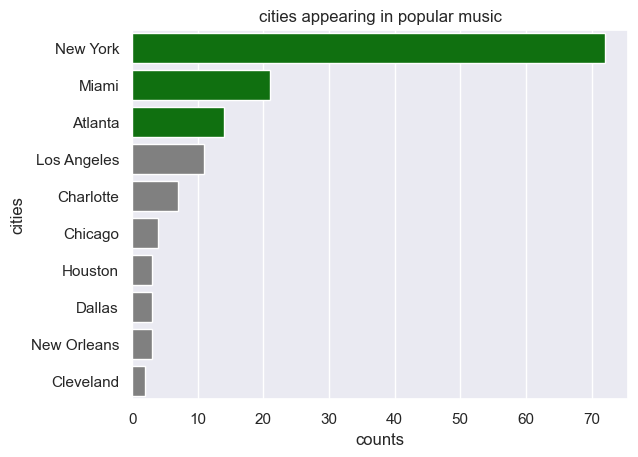

In [647]:
cities = [x.split(' ')[1].lower()  if re.search('\s+', x) else x.lower() for x in pd.read_csv('./cities.csv').city]

full_lyrics_occ_df = pd.DataFrame()
df_base = pd.DataFrame({'words' : [], 'counts' : []})


for years in df_lyrics_occ.values():
    if full_lyrics_occ_df.shape[1] != 2:
        full_lyrics_occ_df = count_occurances(years)
    else:
        full_lyrics_occ_df = count_occurances(full_lyrics_occ_df, years)
    

cities_df = full_lyrics_occ_df.loc[full_lyrics_occ_df.words.isin(cities)]
cities_df.index = range(cities_df.shape[0])

# after viewing 36 rows, which seems to be manageable by personal effort, I decided to drop some words that presumably do not refer to city names
# such as 'worth'. As there is more reason to assume it does not refer to the city of Fort Worth.

cities_df = cities_df.drop(index=[1, 3, 5, 6, 13, 16, 27, 32])[ : 10].drop(columns='words')
cities_df.index = range(cities_df.shape[0])
cities_df = pd.concat([cities_df, pd.DataFrame({'cities' : ['New York', 'Miami', 'Atlanta', 'Los Angeles', 'Charlotte', 'Chicago', 'Houston', 'Dallas', 'New Orleans', 'Cleveland']})], axis=1)
#print(cities_df)

plt.title('cities appearing in popular music')
cols = ['green' if (x > cities_df.counts[3]) else 'gray' for x in cities_df.counts]
sns.barplot(data = cities_df, x = 'counts', y = 'cities', palette=cols)
plt.show()

## different occupations in lyrics

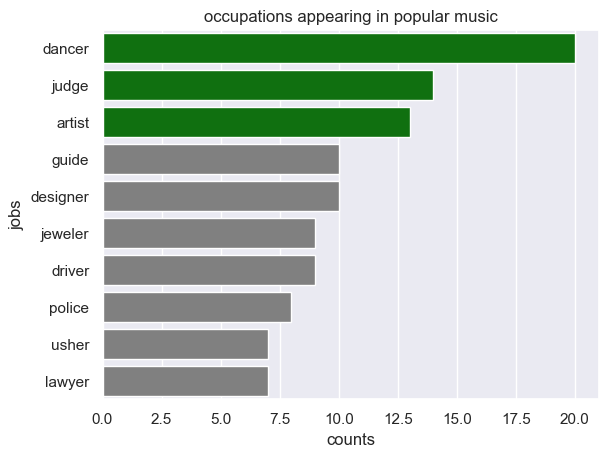

      words  counts
0    dancer    20.0
1     judge    14.0
2    artist    13.0
3     guide    10.0
4  designer    10.0
5   jeweler     9.0
6    driver     9.0
7    police     8.0
8     usher     7.0
9    lawyer     7.0


In [646]:
jobs = open('./jobs.csv').read()
# source: https://gist.github.com/wsc/1083459

jobs = [w.split(' ')[-1].lower() if re.search('\s+', w) else w.lower() for w in jobs.split('\n')]

jobs_df = full_lyrics_occ_df.loc[full_lyrics_occ_df.words.isin(jobs)]
jobs_df.index = range(jobs_df.shape[0])

plt.title('occupations appearing in popular music')
cols = ['green' if (x > jobs_df.counts[3]) else 'gray' for x in jobs_df.counts]
sns.barplot(data = jobs_df[ : 10], x = 'counts', y = 'words', palette=cols)
plt.ylabel('jobs')
plt.show()
print(jobs_df[: 10])

# Analysis on Corpus

## You vs. I

calculation of rate = (# of i - # of you) / # of you


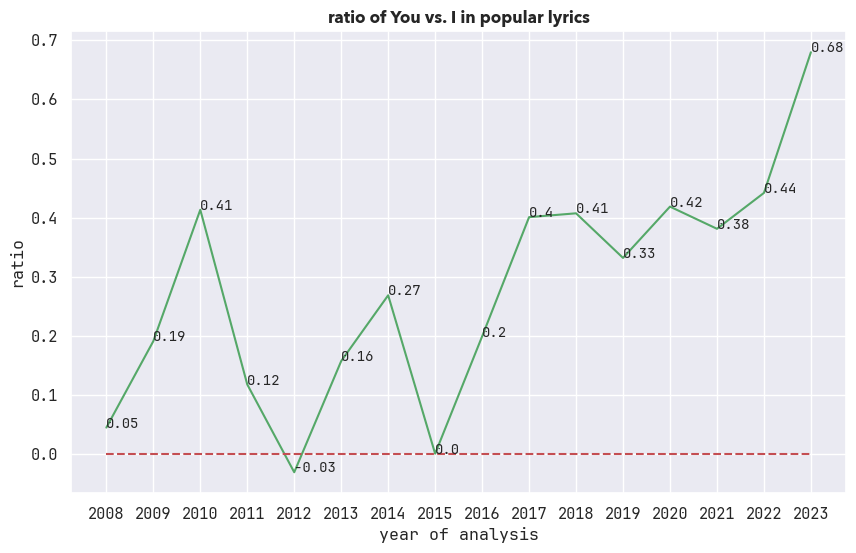

In [654]:
you_v_i = pd.DataFrame({'year' : [], 'you' : [], 'i' : [], 'rate' : []})
for key, val in df_lyrics_occ.items():
    year_of_analysis = int(re.search('\d\d\d\d', key)[0])
    you = int(val.loc[val.words == 'you'].counts.values[0])
    i = int(val.loc[val.words == 'i'].counts.values[0])
    rate = (i - you) / you
 
    you_v_i = pd.concat([you_v_i, pd.DataFrame({'year' : year_of_analysis, 'you' : you, 'i' : i, 'rate' : rate}, index=[0])])

you_v_i = you_v_i.set_index('year')
you_v_i = you_v_i.sort_index()

plt.figure(figsize=(10, 6))
# question at hand: by how more percentage is there i than you
# (you - i)/you
print('calculation of rate = (# of i - # of you) / # of you')
sns.lineplot(data = you_v_i, x = you_v_i.index, y = you_v_i.rate, color='g')
plt.title('ratio of You vs. I in popular lyrics', **avenir)
plt.yticks(**jbmono)
plt.xticks(range(2008, 2024, 1), **jbmono)
plt.hlines(0.0, 2008, 2023, color='r', linestyles='--')
#plt.text( 2010, 0.6, '* ratio = \n(# of "I" / # of "You) / # of "You"', **jbmono)
yr = 2008
for rate in you_v_i['rate']:
    plt.text(yr, rate, round(rate, 2), **jbmono, **{'size' : 10})
    yr += 1

plt.ylabel('ratio', **jbmono)
plt.xlabel('year of analysis', **jbmono)

plt.show()

## Love as a Recurring Theme

In [660]:
lv = pd.DataFrame({'rank' : []})

for yr, love in df_lyrics_occ.items():
    year = int(re.search('\d\d\d\d', yr)[0])
    love_rank = love.loc[love.words == 'love'].index[0] + 1

    ldf = pd.DataFrame({'rank' : love_rank}, index=[year])
    lv = pd.concat([lv, ldf], axis = 0)
    lv = lv.sort_index()

lv.T


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
rank,13.0,6.0,4.0,7.0,4.0,4.0,3.0,3.0,12.0,8.0,8.0,4.0,16.0,9.0,5.0,10.0


In [658]:
df_lyrics_occ['2008_lyrics'][:13]

,words,counts
0,i,1252.0
1,you,1198.0
2,like,245.0
3,yeah,199.0
4,can,198.0
5,know,190.0
6,just,190.0
7,now,157.0
8,she,143.0
9,don,136.0


In [571]:
def token_to_search(token : str) -> pd.DataFrame:
    df = pd.DataFrame({'year' : [], 'counts' : []})
    df.index.name = token
    for keys, years in df_lyrics_occ.items():
        year_of_analysis = int(re.search('\d\d\d\d', keys)[0])
        try:
            occ = list(years.loc[years.words == token].counts)[0]  
        except:
            occ = 0  
        df_new = pd.DataFrame({'year' : year_of_analysis, 'counts' : occ}, index=[0])
        

        df = pd.concat([df, df_new])
    df = df.set_index('year')
    df = df.sort_index()
    return df

Text(2005, 5, 'source: Yahoo Finance')

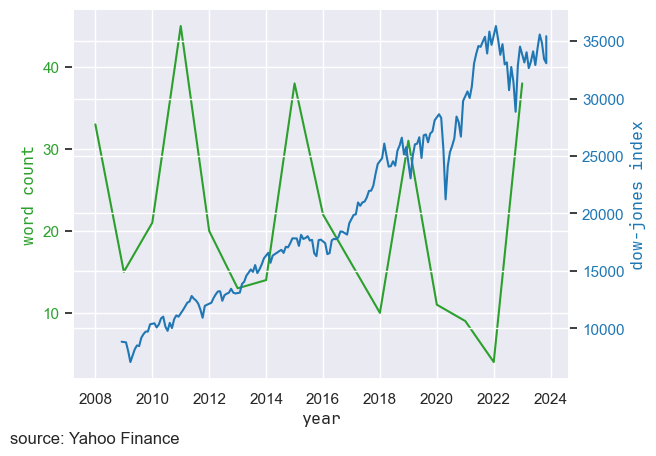

In [643]:
a = token_to_search('money')
# a = pd.DataFrame({'a' : [1, 2, 3], 'b' : [1, 2,3]})
# a.index.name = 'abc'
# a['a'].append(10)
year = list(a.index)

# word count 
money_occ = list(a.counts)

# dow-jones index
dji_df = pd.read_csv('./dji.csv')[['Date', 'Open']]
date_to_float = lambda x : int(re.search('\d\d\d\d-*\d\d', x)[0].split('-')[0]) + int(re.search('\d\d\d\d-*\d\d', x)[0].split('-')[1]) / 13
dji_df['Date'] = dji_df.Date.map(date_to_float)

year_dji = dji_df['Date']
dji_index = dji_df['Open']

fig, ax1 = plt.subplots()

# Create the first y-axis (left)
color = 'tab:green'
ax1.set_xlabel('year', **jbmono)
ax1.set_ylabel('word count', color=color, **jbmono)
line1 = ax1.plot(year, money_occ, color=color, label='word count (money)')
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis (right)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('dow-jones index', color=color, **jbmono)
line2 = ax2.plot(year_dji, dji_index, color=color, label='DJI')
ax2.tick_params(axis='y', labelcolor=color)

plt.text(2005, 5, 'source: Yahoo Finance')

In [653]:
token_to_search('new')

,counts
year,
2008.0,20.0
2009.0,32.0
2010.0,32.0
2011.0,14.0
2012.0,14.0
2013.0,15.0
2014.0,18.0
2015.0,5.0
2016.0,14.0


2010.923076923077

0.08333333333333333